<a href="https://colab.research.google.com/github/JAYASURYAb/ML-project2/blob/master/Campus_recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/content/Placement_Data_Full_Class .csv')


In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**We can observe we have null values only in salary column,So we have, 215 - 148 = 67.**

**Therfore,we have 67 null values.That means 67 members are not hired.**



In [6]:
dataset['salary'].fillna(value=0, inplace=True)

**Filling missing value by 0,So that now ,we don't get any null values**

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Getting column objects data

In [8]:
column=dataset.select_dtypes(include=['object'])
for col in column:
    display(dataset[col].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

**Except for hsc_s and degree_t with 3 classes, all other have 2 classes each and we can notice 148 students are placed and 67 students are not placed.**
**Now the challenge is:**

****Which factor influenced a candidate in getting placed?****



##Exploring & Visualizations Data by each Features

###Gender

In [9]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


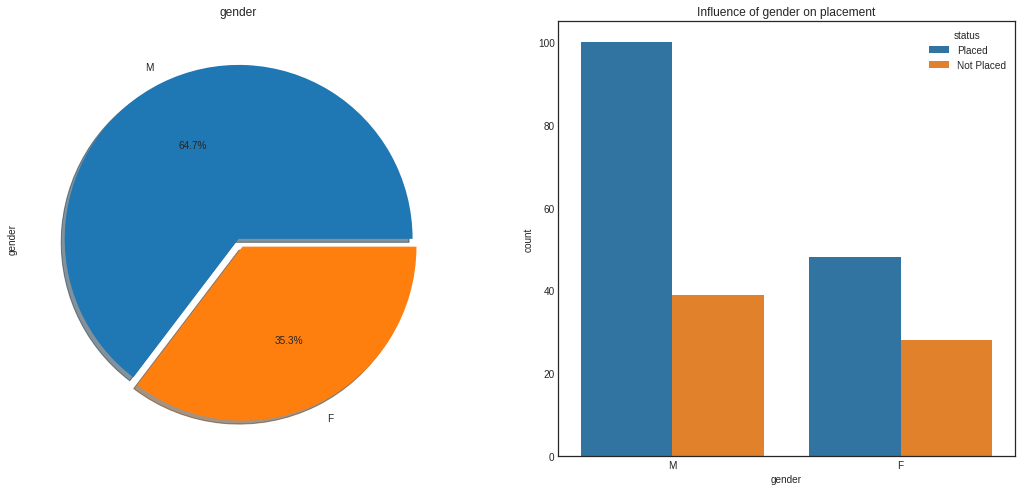

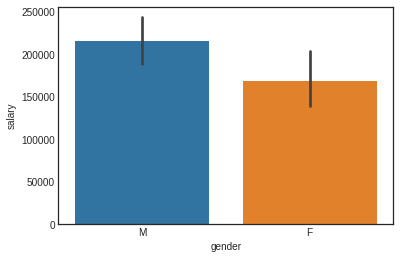

In [10]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender')
sns.countplot(x = 'gender',hue = "status",data = dataset)
ax[1].set_title('Influence of gender on placement')
plt.show()
ax = sns.barplot(x="gender", y="salary", data=dataset)
plt.show()


So,we observe
*   The number of placed male students are almost double than placed female students 
*   Male students are offered slightly greater salary than female on an average.


###Board of Education(ssc_b,hsc_b,hsc_s)


*   ssc_b:Secondary Education board-10th grade
*   hsc_b:Higher Secondary Education board-12th grade
*   hsc_s : Specialization in Higher Secondary Education






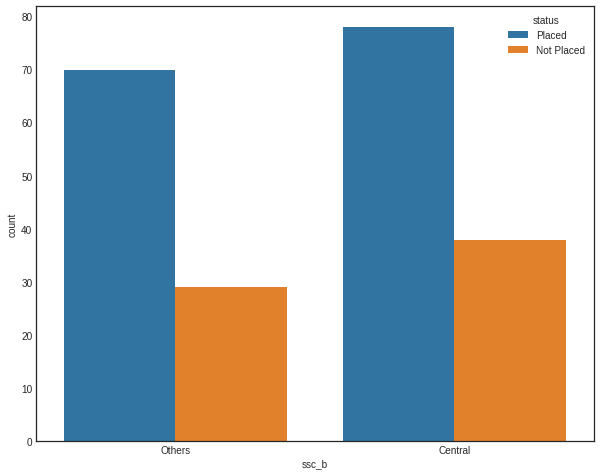

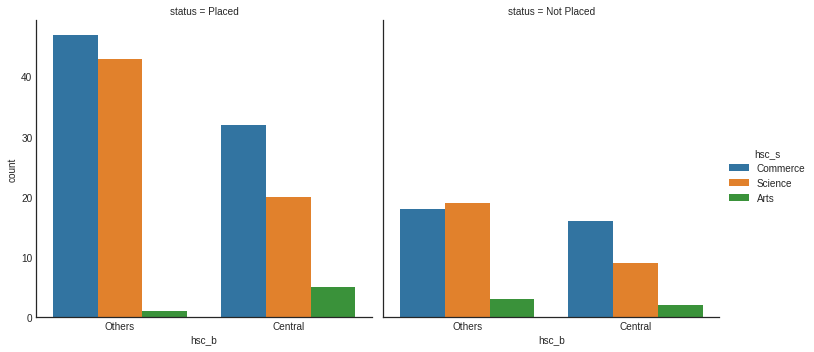

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='ssc_b',hue='status',data=dataset)
sns.catplot(x='hsc_b',hue='hsc_s',col='status',data=dataset,kind='count')
plt.show()

So,we observe
*   In ssc_b,the central board students are placed more than other boards.
*   But we see in hsc_b,the other boards students are placed more than the central board.
*   Therfore,Board doesn't matter in placements.



###Degree,Specialisation

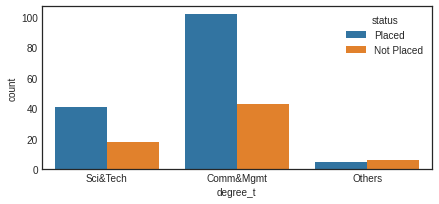

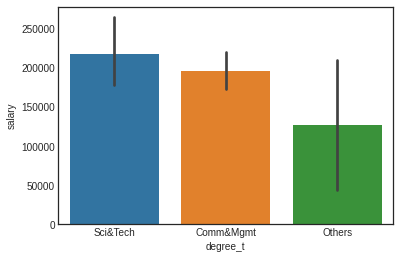

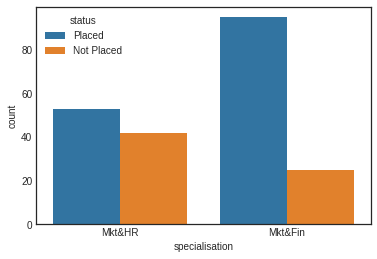

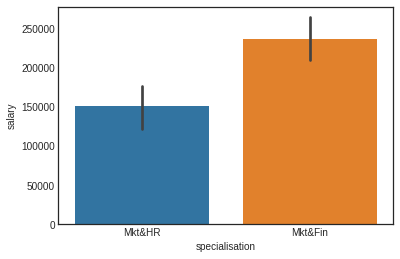

In [12]:
plt.figure(figsize=(7,3))
sns.countplot(x="degree_t", hue='status',data=dataset)
plt.show()
ax = sns.barplot(x="degree_t", y="salary", data=dataset)
plt.show()
sns.countplot(x="specialisation", hue='status',data=dataset)
plt.show()
ax = sns.barplot(x="specialisation", y="salary", data=dataset)
plt.show()

So,here we observe
*   Commerce and Science degree students are placed more and other students are less placed.
* By salary wise,Sci&tech students gets paid
more and second comes Commerce&mgmt and others are paid less salary.
*  Specialisation matters lot in placements.Mkt&fin students have more placements compared to Mkt&HR.By salary wise also MKT&Fin students are highly paid compared to Mkt&HR.


###Percentage

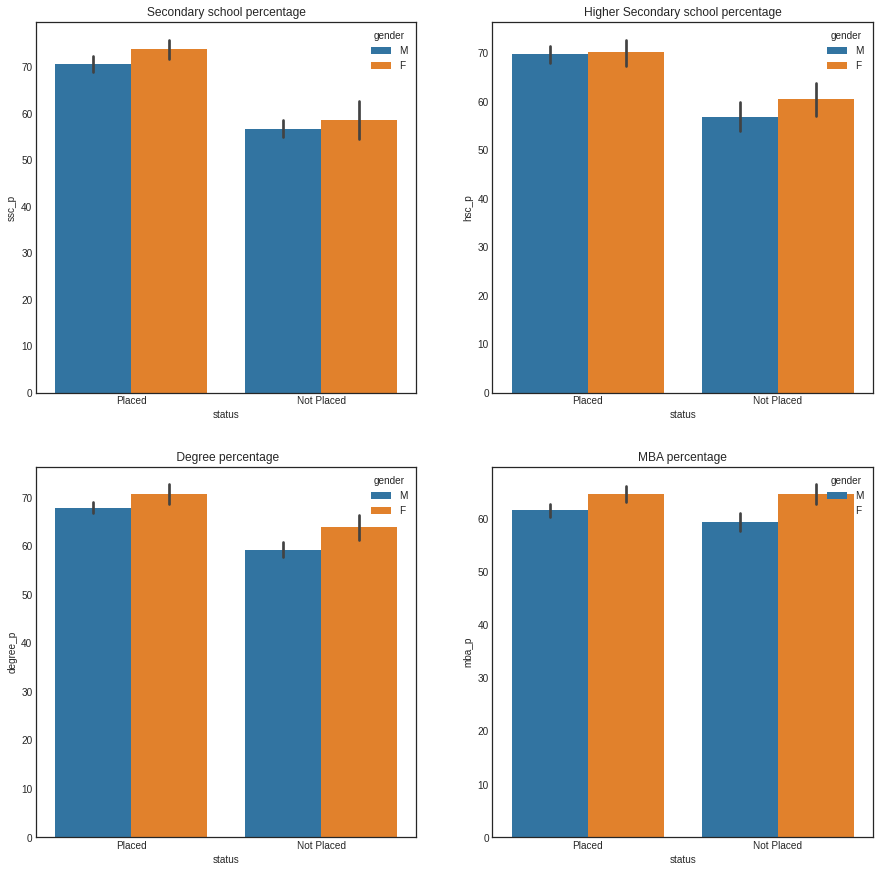

In [13]:
plt.figure(figsize = (15, 15))
ax=plt.subplot(221)
sns.barplot(x='status',y='ssc_p',hue='gender',data=dataset)
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
sns.barplot(x='status',y='hsc_p',hue='gender',data=dataset)
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
sns.barplot(x='status',y='degree_p',hue='gender',data=dataset)
ax.set_title(' Degree percentage')
ax=plt.subplot(224)
sns.barplot(x='status',y='mba_p',hue='gender',data=dataset)
ax.set_title('MBA percentage')
plt.show()

So,from above plots we observe
*   Female students got a higher percentage in all fields as compared to male students.
*   Students with higher percentages in their 10th,12th and degree have a better chance of placements.
*   There's no guarantee of placements in MBA for good percentage.
*   Therefore,percentage doesn't influence over the salary.



###Work experience

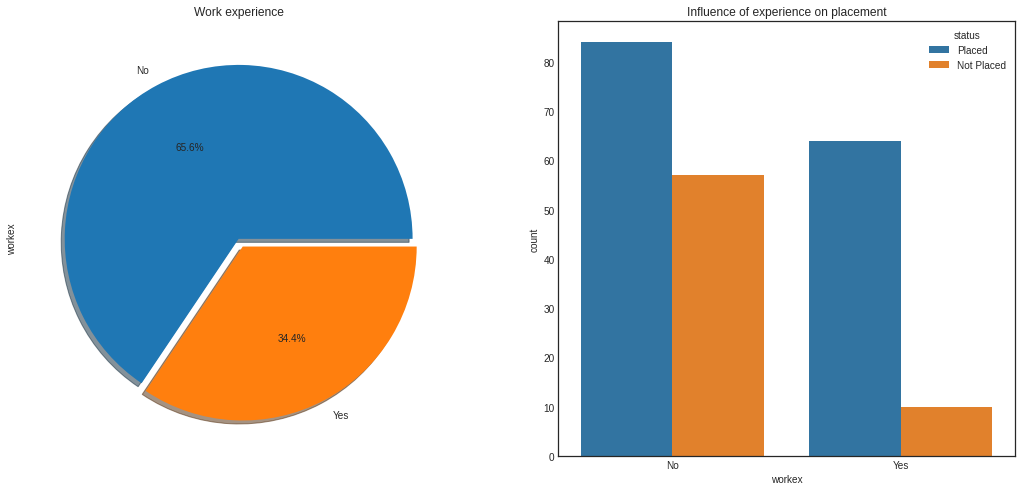

In [14]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = dataset)
ax[1].set_title('Influence of experience on placement')
plt.show()

So,we observe
*   There are more students who don't have a work experience.
* And students with no work experience got placed more than the students who had work experience.
*  We can conclude that work experience doesn't influence a student in the recruitment process.But having work experience can benefit in increasing the chances of geting placed.



##Data preprocessing

In [15]:
x = dataset.iloc[:,[4,7,9,10,11,12]].values
y = dataset.iloc[:,-2].values

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [2,4])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
x

array([[1.0, 0.0, 0.0, ..., 58.0, 55.0, 58.8],
       [0.0, 1.0, 1.0, ..., 77.48, 86.5, 66.28],
       [1.0, 0.0, 1.0, ..., 64.0, 75.0, 57.8],
       ...,
       [0.0, 1.0, 1.0, ..., 73.0, 59.0, 69.72],
       [1.0, 0.0, 0.0, ..., 58.0, 70.0, 60.23],
       [1.0, 0.0, 0.0, ..., 53.0, 89.0, 60.22]], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)                                            

In [19]:
x_train

array([[0.0, 1.0, 1.0, ..., 67.0, 95.0, 64.86],
       [0.0, 1.0, 1.0, ..., 64.27, 64.0, 66.23],
       [1.0, 0.0, 1.0, ..., 61.4, 68.0, 66.88],
       ...,
       [1.0, 0.0, 1.0, ..., 78.0, 95.5, 68.53],
       [0.0, 1.0, 1.0, ..., 69.5, 56.0, 56.94],
       [1.0, 0.0, 0.0, ..., 65.6, 58.0, 55.47]], dtype=object)

In [20]:
x_test

array([[1.0, 0.0, 1.0, 0.0, 82.0, 69.0, 84.0, 58.31],
       [0.0, 1.0, 1.0, 0.0, 78.0, 61.0, 88.56, 71.55],
       [1.0, 0.0, 1.0, 0.0, 50.0, 54.0, 71.0, 65.69],
       [1.0, 0.0, 0.0, 1.0, 90.0, 83.0, 80.0, 73.52],
       [1.0, 0.0, 0.0, 1.0, 61.12, 56.2, 67.0, 62.65],
       [0.0, 1.0, 1.0, 0.0, 65.0, 81.0, 88.0, 72.78],
       [1.0, 0.0, 1.0, 0.0, 65.58, 72.11, 57.6, 56.66],
       [1.0, 0.0, 1.0, 0.0, 60.5, 84.0, 98.0, 65.25],
       [1.0, 0.0, 1.0, 0.0, 73.6, 73.3, 96.8, 55.5],
       [1.0, 0.0, 0.0, 1.0, 53.0, 65.0, 64.0, 58.32],
       [0.0, 1.0, 0.0, 1.0, 80.0, 78.0, 97.0, 70.48],
       [1.0, 0.0, 1.0, 0.0, 68.0, 64.0, 93.0, 62.56],
       [1.0, 0.0, 0.0, 1.0, 62.0, 54.0, 72.0, 55.41],
       [0.0, 1.0, 1.0, 0.0, 73.0, 66.0, 70.0, 68.07],
       [1.0, 0.0, 0.0, 1.0, 51.0, 57.5, 57.63, 62.72],
       [1.0, 0.0, 0.0, 1.0, 61.0, 61.0, 58.0, 53.94],
       [1.0, 0.0, 1.0, 0.0, 62.0, 64.0, 53.88, 54.97],
       [1.0, 0.0, 1.0, 0.0, 62.5, 61.0, 93.91, 69.03],
       [1.0, 0.0, 1.0,

In [21]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [22]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

##Standardisation

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,4:] = sc.fit_transform(x_train[:,4:])
x_test[:,4:] = sc.transform(x_test[:,4:])

##Comparing classification models

*   Logistic Regression
*   KNN
*   Decision Tree
*   Random Forest
*   linear SVC
*   Kernel SVC


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [25]:
l_cla = LogisticRegression()
k_cla = KNeighborsClassifier(n_neighbors = 10)
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier(n_estimators = 200)
s_cla = SVC(kernel='linear')
ks_cla = SVC(kernel= 'rbf')

In [26]:
l_cla.fit(x_train, y_train)
k_cla.fit(x_train, y_train)
d_cla.fit(x_train, y_train)
r_cla.fit(x_train, y_train)
s_cla.fit(x_train, y_train)
ks_cla.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
l_pred = l_cla.predict(x_test)
k_pred = k_cla.predict(x_test)
d_pred = d_cla.predict(x_test)
r_pred = r_cla.predict(x_test)
s_pred = s_cla.predict(x_test)
ks_pred = ks_cla.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)

In [30]:
print(l_c) 
print(k_c) 
print(d_c) 
print(r_c) 
print(s_c) 
print(ks_c)

[[15  5]
 [ 2 43]]
[[13  7]
 [ 3 42]]
[[14  6]
 [11 34]]
[[15  5]
 [ 1 44]]
[[13  7]
 [ 1 44]]
[[10 10]
 [ 0 45]]


In [31]:
from sklearn.metrics import accuracy_score
l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [32]:
print('Logistic Regression: ' + str(l_a) + '\nKNN: ' + str(k_a) + '\nDecision Tree: ' + str(d_a) + '\nRandom Forest: ' + str(r_a) + '\nLinear SVC: ' + str(s_a) + '\nKernel SVC: ' + str(ks_a))

Logistic Regression: 0.8923076923076924
KNN: 0.8461538461538461
Decision Tree: 0.7384615384615385
Random Forest: 0.9076923076923077
Linear SVC: 0.8769230769230769
Kernel SVC: 0.8461538461538461


**Random Forest shows highest accuracy score of 90.76%**

**So we can conclude *Random Forest* classification model is best fit for our dataset**



##Conclusion

*  More male students got placed as compared to female students. (Since more male students sat for placements) 
*   Male students got higher salaries as compared to female students.
*   Board of Education doesn't matter in placements
*   Students with higher percentages in 10th,12th and degree have a better chance of placements.But MBA percentages don't influence over placements.
*  Students with no work experience got placed more than the students who had work experience.
*  Specialisation matters lot in placements.Mkt&fin students have more placements compared to Mkt&HR.By salary wise also MKT&Fin students are highly paid compared to Mkt&HR.
*  Sci&Tech students gets a higher salary compared to Comm&Mgmt and other degrees.



**Thank you**

***Jayasurya B*** 